# HomeWork 1 - Boston Housing Data
### Submitted by Jocelyn Prince

# 0.Import Libraries

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from keras.utils import plot_model


In [0]:
tf.__version__


'2.0.0-beta1'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# 1.Import Boston Housing Dataset from Keras

In [0]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# 2.Train / Test split - already done by keras. just print the shape

In [0]:
print("X_train: " + str(X_train.shape))
print("X_test: "+ str(X_test.shape))
print("y_train: "+ str(y_train.shape))
print("y_test: "+ str(y_test.shape))

X_train: (404, 13)
X_test: (102, 13)
y_train: (404,)
y_test: (102,)


# 3.Explore Data

In [0]:
print(X_train)

[[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]


In [0]:
print(y_test)

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


There are 14 attributes in each case of the dataset:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

TARGET ATTRIBUTE:

MEDV - Median value of owner-occupied homes in $1000's

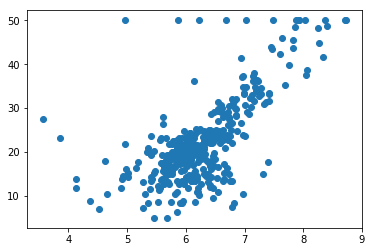

In [0]:
plt.scatter(X_train[:, 5], y_train)

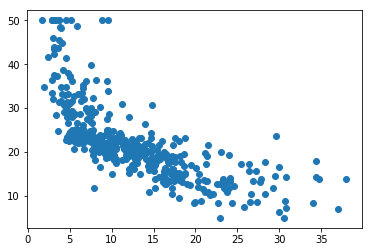

In [0]:
plt.scatter(X_train[:, 12], y_train)

# 4.Normalize Values

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [0]:
print(X_train)

[[-0.27224633 -0.48361547 -0.43576161 ...  1.14850044  0.44807713
   0.8252202 ]
 [-0.40342651  2.99178419 -1.33391162 ... -1.71818909  0.43190599
  -1.32920239]
 [ 0.1249402  -0.48361547  1.0283258  ...  0.78447637  0.22061726
  -1.30850006]
 ...
 [-0.40202987  0.99079651 -0.7415148  ... -0.71712291  0.07943894
  -0.67776904]
 [-0.17292018 -0.48361547  1.24588095 ... -1.71818909 -0.98764362
   0.42083466]
 [-0.40422614  2.04394792 -1.20161456 ... -1.30866202  0.23317118
  -1.15392266]]


# 5.Create custom activation function (sigmoid or tanh or something else)

In [0]:
# activation
def my_tanh(z):
    return tf.sinh(z)/tf.cosh(z)

# 6.Create custom initializer (Uniform or Normal or something else)

In [0]:
# initializer with Minimum Value of 0.5
def my_initializer_uniform(shape, minval=0.5, dtype=tf.float32):
    # print("Shape[0]" + str(shape[0]))
    # print("Shape[1]" + str(shape[1]))
    return tf.random.uniform(shape, dtype=dtype, minval=0.5)



# 7.Create custom loss (MSE, RMSE or something else)

In [0]:
# loss function: RMSE
def jp_loss(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    squared_loss = tf.square(error)
    return squared_loss



# 8.Train your model using your custom functions

In [0]:
inputs = keras.Input(shape=(13,))
x=Dense(units=13, activation=my_tanh, kernel_initializer=my_initializer_uniform)(inputs)
y=Dense(10, activation=my_tanh, kernel_initializer=my_initializer_uniform)(x)
output=Dense(1)(y)

In [0]:
model = keras.Model(inputs, output)
model.compile(loss=jp_loss, optimizer='adam', metrics=['mean_squared_error'])

In [0]:
callbacks = [
  tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

In [0]:
t1 = time.time()
hist = model.fit(X_train, y_train, epochs=900, batch_size=16, callbacks=callbacks, validation_split=0.2, verbose = 0)
t2 = time.time()
print("Execution time (sec): " + str(t2 - t1) + " for " + str(len(hist.epoch)) + " epochs")

Execution time (sec): 102.15556454658508 for 533 epochs


In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 333
Trainable params: 333
Non-trainable params: 0
_________________________________________________________________


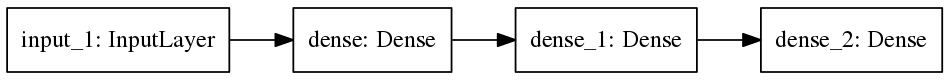

In [0]:
keras.utils.plot_model(model, to_file='model.png',show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=128)

In [0]:
hidden1 = model.layers[1]
weights, bias = hidden1.get_weights()
weights

array([[ 1.7344708 ,  1.4061369 ,  1.2446345 ,  0.58143574,  1.2962924 ,
         1.3068666 ,  0.7785546 ,  1.3744076 ,  0.7302146 ,  1.5057039 ,
         0.44729573,  0.6539682 ,  0.635188  ],
       [ 0.7104919 ,  1.0380708 ,  0.19279552,  0.70417583,  0.44723833,
         0.41081727,  0.6837196 ,  0.23891607,  0.06530369,  0.4984894 ,
         1.5456407 ,  0.35446066,  0.12313918],
       [ 0.31545117,  0.19840401,  0.40075204, -0.8262089 ,  0.6176758 ,
         0.08864799, -0.04470779,  0.65768254,  0.97306633,  0.9057519 ,
        -0.39244348,  0.80825454,  0.3886294 ],
       [ 0.13315798,  0.25926787,  0.46466818,  0.07428744,  0.47951815,
         0.22977315, -0.2969447 ,  0.45252734,  0.08462073,  0.54194623,
         0.17259234,  0.5091712 ,  0.9723957 ],
       [ 0.32330716,  0.09500892,  0.9595036 , -0.26333413,  0.592014  ,
         0.3905257 ,  0.42279014,  0.9715232 ,  0.91442466,  0.59733814,
         0.05917672,  0.89614326,  0.38497964],
       [ 1.4207599 ,  1.224489

In [0]:
bias

array([-0.97731304, -1.1298379 , -0.9038245 ,  0.16831234, -0.9469018 ,
       -0.93147874, -1.4699298 , -0.6622759 , -1.1148173 , -0.92902935,
       -1.2267127 , -0.7651758 , -1.4479913 ], dtype=float32)

# 9.Visualize the history of your training

<function matplotlib.pyplot.show(*args, **kw)>

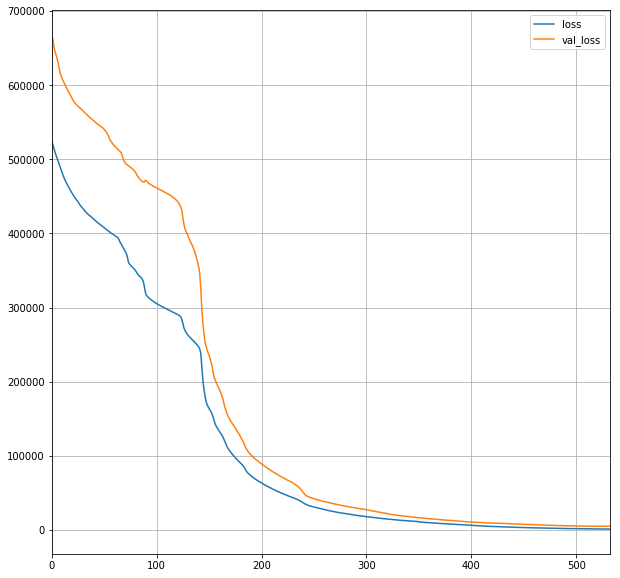

In [0]:
keys = ['loss', 'val_loss']
subset_hist = {}
for x in keys:
        subset_hist[x] = hist.history[x]

pd.DataFrame(subset_hist).plot(figsize=(10,10))
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

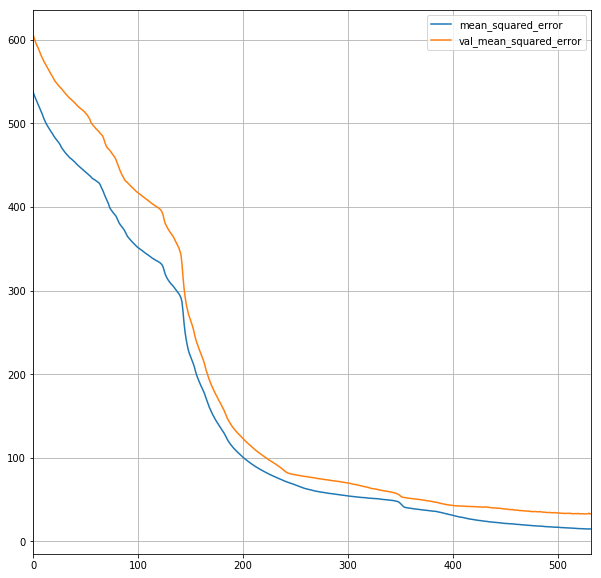

In [0]:
keys = ['mean_squared_error', 'val_mean_squared_error']
subset_hist = {}
for x in keys:
        subset_hist[x] = hist.history[x]

pd.DataFrame(subset_hist).plot(figsize=(10,10))
plt.grid(True)
plt.show

In [0]:
mse_test = model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
X_new = X_train[:5]
y_pred = model.predict(X_new)
y_pred.round(2)


array([[16.62],
       [37.72],
       [38.48],
       [20.93],
       [16.85]], dtype=float32)

In [0]:
y_train[:5]

array([15.2, 42.3, 50. , 21.1, 17.7])

In [0]:
X_new = X_test[:5]
y_pred = model.predict(X_new)
y_pred.round(2)

array([[10.95],
       [19.91],
       [20.86],
       [19.73],
       [23.8 ]], dtype=float32)

In [0]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])